# Week 3 handin

## 01 Assignment
Here is the text for the assignment linked to

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

## 03 Solution part 1

In [1]:
# from modules.week7.browser import get_browser
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from time import sleep
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
import requests

In [2]:
# 1.2 some code here with docstrings
def get_covid_page():
    profile = webdriver.FirefoxProfile()
    profile.set_preference(
        "general.useragent.override",
        "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0",
    )
    options = Options()
    options.headless = True
    browser = webdriver.Firefox(options=options)
    browser.get("https://www.nationalgeographic.com/")
    browser.implicitly_wait(2)

    elem = browser.find_element_by_xpath('//*[@id="fitt-analytics"]/div[2]/div/div/div/div/nav/ul/li[2]/div/a')
    elem.click()

    sleep(3)

    elem = browser.find_element(By.CLASS_NAME, "SearchBar__Input")
    elem.send_keys("Covid")
    elem.submit()

    sleep(3)

    return browser.page_source

soup = BeautifulSoup(get_covid_page(), "html.parser")
atags = soup.select("div[class=ResultCard] > div > a")

In [8]:
# 2.1
def mapper(atag):
    return atag.get("href")

links = list(map(mapper, atags))

def get_links(link: str):
    response = requests.get(link)
    response.raise_for_status()
    s = BeautifulSoup(response.text, "html.parser")
    return link.split("/")[-1], s.select("a")

with ThreadPoolExecutor(len(links)) as ex:
    all_links = list(ex.map(get_links, links))

print(len(all_links))
for links in all_links:
    print(f"{links[0]}: {len(links[1])}")

16
how-covid-affects-mens-sexual-health-20210922: 196
can-india-tame-the-worlds-biggest-covid-surge-20210428: 184
coronavirus-vaccine-tracker-how-they-work-latest-developments-cvd: 513
what-will-family-reunions-look-like-in-our-second-covid-summer: 185
remembering-lives-lost-covid-19-toll: 161
how-covid-19-can-damage-all-five-senses: 165
tackling-job-onecovid-19-20210120: 192
670000-flags-mark-covids-toll-20210920: 190
faces-covid-19-toll-november-23: 167
coronavirus-disproportionately-impacts-african-americans: 169
guide-to-overcoming-coronavirus-misinformation-infodemic: 194
navigating-covid-19-death-and-loss-with-your-child: 56
long-covid-afflicts-kids-too-heres-what-we-know-so-far: 173
what-about-mink-covid-19-august-20: 169
two-steps-to-defeat-covid-19-august-05: 173
millions-women-volunteers-form-india-frontline-covid-19-response: 173


## 04 Solution part 2

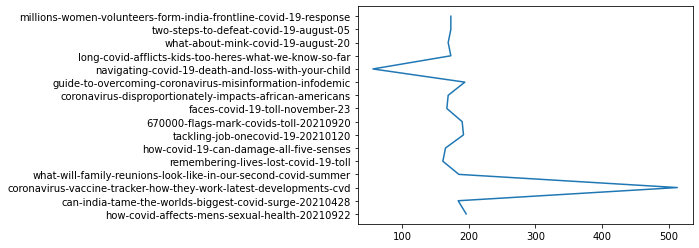

In [9]:
import matplotlib.pyplot as plt

x_values = [len(links[1]) for links in all_links]
y_values = [links[0] for links in all_links]

plt.plot(x_values, y_values)